In [1]:
# # we use Kaggle dataset from here:
# # https://www.kaggle.com/datasets/amritachatterjee09/lead-scoring-dataset/data

# # dataset downloaded as CSV file Lead Scoring.csv and commited to github

# About Dataset
# Context
# An education company named X Education sells online courses to industry professionals. On any given day, many professionals 
# who are interested in the courses land on their website and browse for courses.

# The company markets its courses on several websites and search engines like Google. Once these people land on the website, 
# they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form 
# providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads 
# through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, 
# etc. Through this process, some of the leads get converted while most do not. 
# The typical lead conversion rate at X education is around 30%.

# Now, although X Education gets a lot of leads, its lead conversion rate is very pool. 
# For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 
# To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

# There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.

# X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score h have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Content
# Variables Description

# Prospect ID - A unique ID with which the customer is identified.
# Lead Number - A lead number assigned to each lead procured.
# Lead Origin - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
# Lead Source - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
# Do Not Email -An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
# Do Not Call - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
# Converted - The target variable. Indicates whether a lead has been successfully converted or not.
# TotalVisits - The total number of visits made by the customer on the website.
# Total Time Spent on Website - The total time spent by the customer on the website.
# Page Views Per Visit - Average number of pages on the website viewed during the visits.
# Last Activity - Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
# Country - The country of the customer.
# Specialization - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
# How did you hear about X Education - The source from which the customer heard about X Education.
# What is your current occupation - Indicates whether the customer is a student, umemployed or employed.
# What matters most to you in choosing this course An option selected by the customer - indicating what is their main motto behind doing this course.
# Search - Indicating whether the customer had seen the ad in any of the listed items.
# Magazine
# Newspaper Article
# X Education Forums
# Newspaper
# Digital Advertisement
# Through Recommendations - Indicates whether the customer came in through recommendations.
# Receive More Updates About Our Courses - Indicates whether the customer chose to receive more updates about the courses.
# Tags - Tags assigned to customers indicating the current status of the lead.
# Lead Quality - Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead.
# Update me on Supply Chain Content - Indicates whether the customer wants updates on the Supply Chain Content.
# Get updates on DM Content - Indicates whether the customer wants updates on the DM Content.
# Lead Profile - A lead level assigned to each customer based on their profile.
# City - The city of the customer.
# Asymmetrique Activity Index - An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Profile Index
# Asymmetrique Activity Score
# Asymmetrique Profile Score
# I agree to pay the amount through cheque - Indicates whether the customer has agreed to pay the amount through cheque or not.
# a free copy of Mastering The Interview - Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
# Last Notable Activity - The last notable activity performed by the student.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set styling
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('Lead Scoring.csv')
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded with 9240 rows and 37 columns.


In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1. Missing Value Analysis

Many categorical columns in this dataset have a level called 'Select'. This occurs when a customer does not select an option in the form, effectively making it a null value. We will first replace all 'Select' values with `NaN` to get an accurate count of missing data.

In [4]:
# Replace 'Select' with NaN
df = df.replace('Select', np.nan)

# Calculate percentage of missing values per column
missing_data = df.isnull().sum() * 100 / len(df)
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if not missing_data.empty:
    print("Percentage of missing values per column:")
    print(missing_data)
else:
    print("No missing values found (after replacing 'Select').")

Percentage of missing values per column:
How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source    

### Thresholding Missing Values

We will identify columns with more than 35-40% missing values as candidates for removal, as they might not provide sufficient information for modeling.

In [5]:
# Filter columns with more than 40% missing values
cols_to_drop = missing_data[missing_data > 40].index.tolist()
print(f"Columns with > 40% missing values: {cols_to_drop}")

# Also drop 'Prospect ID' and 'Lead Number' as they are unique identifiers
cols_to_drop.extend(['Prospect ID', 'Lead Number'])

print(f"Total columns to drop: {len(cols_to_drop)}")

# Actually drop the columns
df.drop(cols_to_drop, axis=1, inplace=True)
print(f"New dataset shape: {df.shape}")

Columns with > 40% missing values: ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score']
Total columns to drop: 9
New dataset shape: (9240, 28)


## 2. Target Variable Analysis

We will now analyze the distribution of the target variable `Converted`.

In [6]:
converted_counts = df['Converted'].value_counts(normalize=True) * 100
print("Target Variable Distribution (%):")
print(converted_counts)

# sns.countplot(x='Converted', data=df)
# plt.title('Distribution of Converted (Target)')
# plt.show()

Target Variable Distribution (%):
Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64


## 3. Numerical Columns Analysis

Let's check the distributions and basic stats of numerical columns.

In [7]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


### 3.1 Outlier Handling

Columns like `TotalVisits` and `Page Views Per Visit` have extreme outliers. We will cap them at the 99th percentile to prevent them from skewing the model.

In [8]:
def cap_outliers(df, col, percentile=0.99):
    limit = df[col].quantile(percentile)
    df[col] = df[col].clip(upper=limit)
    return limit

for col in ['TotalVisits', 'Page Views Per Visit']:
    limit = cap_outliers(df, col)
    print(f"{col} capped at {limit}")

df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].describe()

TotalVisits capped at 17.0
Page Views Per Visit capped at 9.0


,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9103.000000,9103.000000,9240.000000
mean,3.332747,2.334002,487.698268
std,3.252420,1.985712,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
max,17.000000,9.000000,2272.000000


## 4. Categorical Feature Inspection

We will now look at categorical columns to understand their diversity and identify low-frequency levels.

In [9]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {cat_cols}")

# Check unique value counts
for col in cat_cols:
    print(f"\n{col} ({df[col].nunique()} unique values):")
    print(df[col].value_counts(dropna=False).head(10))

Categorical columns: ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

Lead Origin (5 unique values):
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Lead Source (21 unique values):
Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     1

### Handling Remaining Missing Values

We will impute missing values for the remaining columns. Numerical columns will be imputed with median, and categorical columns with a new 'Unknown' level or the mode.

In [10]:
# Strategy:
# 1. Numeric: Median
# 2. Categorical: 'Unknown' (to preserve the fact that the info was missing)

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Impute numeric
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

print("Remaining missing values:")
print(df.isnull().sum().sum())

Remaining missing values:
0


## 5. Pruning Useless Categorical Columns

We will remove columns with only one unique value or extreme skew (e.g., >99% in one category), as they don't provide predictive signal.

In [11]:
useless_cols = []
for col in cat_cols:
    counts = df[col].value_counts(normalize=True)
    if len(counts) <= 1 or counts.iloc[0] > 0.99:
        useless_cols.append(col)

print(f"Dropping useless categorical columns: {useless_cols}")
df.drop(useless_cols, axis=1, inplace=True)
print(f"New dataset shape: {df.shape}")

Dropping useless categorical columns: ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
New dataset shape: (9240, 16)


## 6.  Bivariate Analysis (Prognostic Value)

Let's visualize the Lead Conversion Rate for various categorical levels.

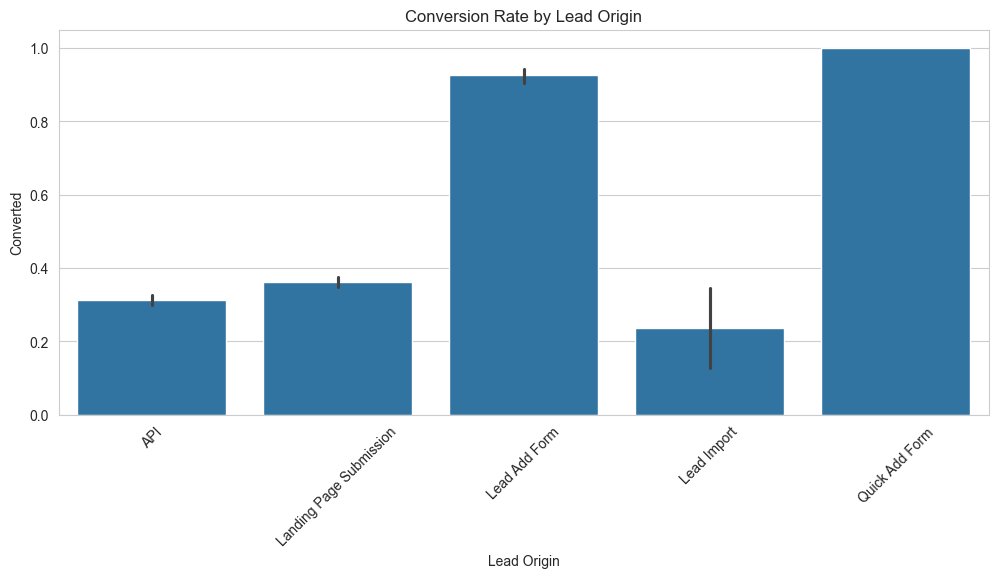

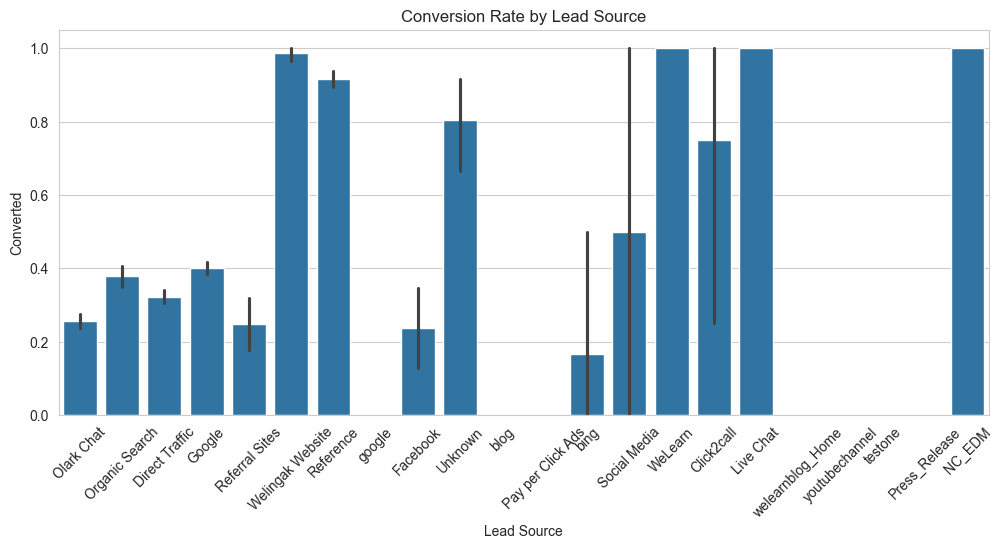

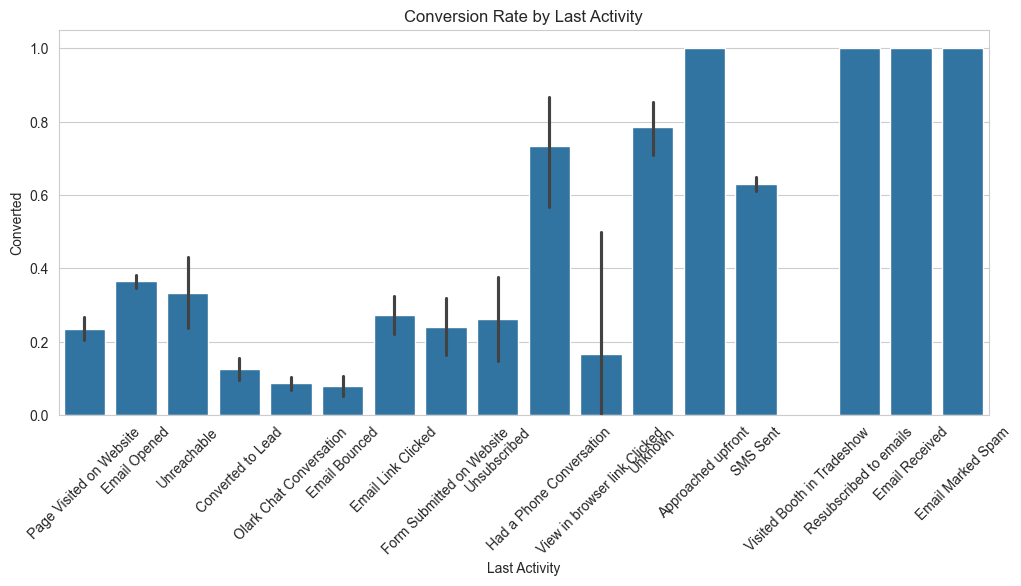

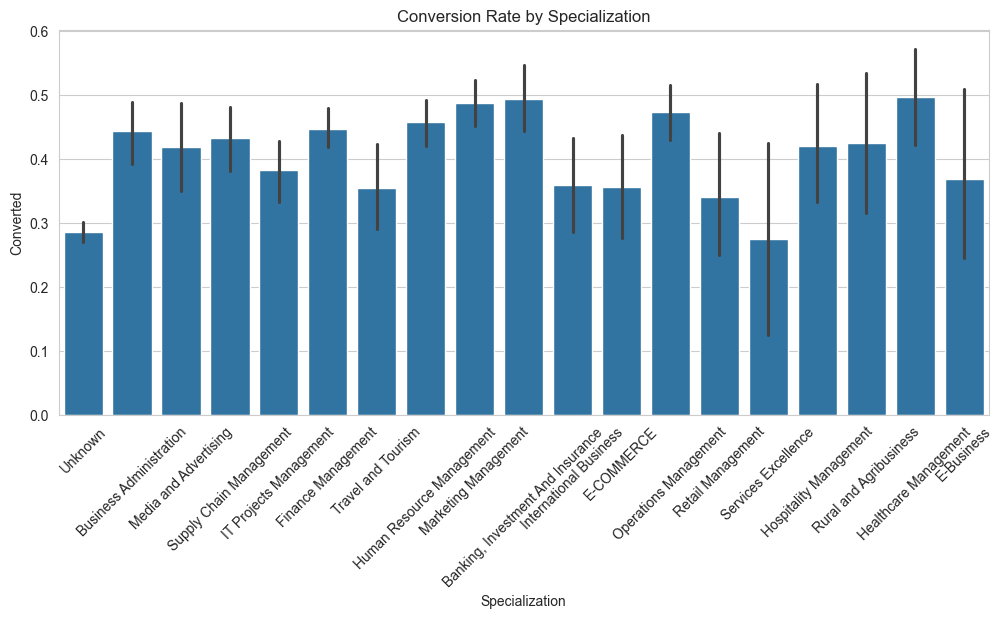

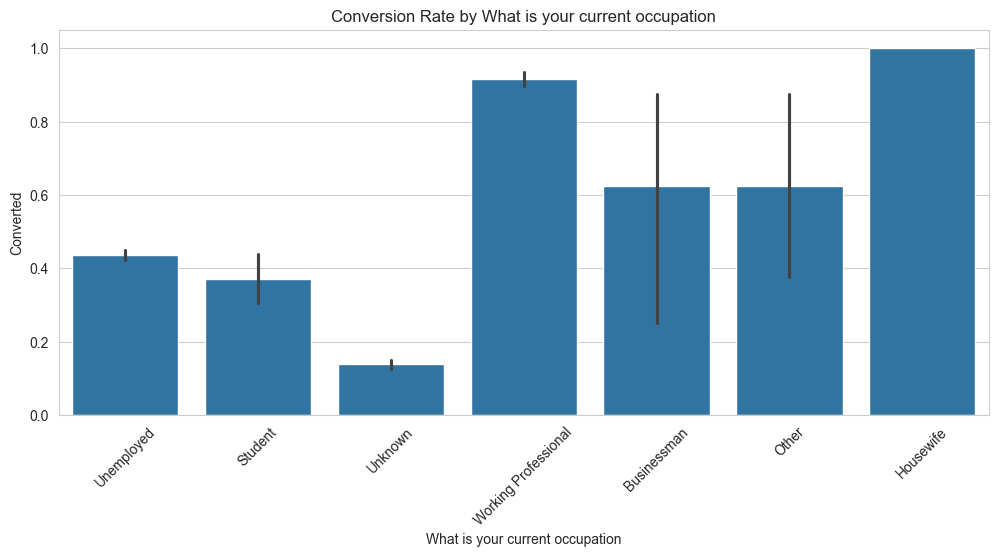

In [12]:
def plot_bivariate(df, col, target='Converted'):
    plt.figure(figsize=(12, 5))
    sns.barplot(x=col, y=target, data=df)
    plt.title(f'Conversion Rate by {col}')
    plt.xticks(rotation=45)
    plt.show()

# Update list of categorical columns after pruning
rem_cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Select top predictive candidates to visualize
features_to_plot = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation']

for feat in features_to_plot:
    if feat in df.columns:
        plot_bivariate(df, feat)